In [2]:
from lbmpy.session import *
from lbmpy.phasefield.analytical import *
from pystencils.fd import evaluate_diffs

# Analytical checks for 3-Phase model

Here you can inspect the components of the free energy. View only bulk or interface contributions, before and after transformation from $U \rightarrow (\rho, \phi,\psi)$:

In [3]:
order_parameters = sp.symbols("rho phi psi")
rho, phi, psi = order_parameters
F, _ = free_energy_functional_3_phases(include_bulk=True,
                                       include_interface=True,
                                       transformed=True,
                                       expand_derivatives=False)
F

                                                                              
                                                                              
 2                            2    2                             2    2       
α ⋅κ₀⋅D(phi/2 - psi/2 + rho/2)    α ⋅κ₁⋅D(-phi/2 - psi/2 + rho/2)    α ⋅κ₂⋅D(p
─────────────────────────────── + ──────────────────────────────── + ─────────
               2                                 2                         2  

                     2                  2                   2                2
          ⎛φ   ψ   ρ⎞  ⎛  φ   ψ   ρ    ⎞       ⎛  φ   ψ   ρ⎞  ⎛φ   ψ   ρ    ⎞ 
   2   κ₀⋅⎜─ - ─ + ─⎟ ⋅⎜- ─ + ─ - ─ + 1⎟    κ₁⋅⎜- ─ - ─ + ─⎟ ⋅⎜─ + ─ - ─ + 1⎟ 
si)       ⎝2   2   2⎠  ⎝  2   2   2    ⎠       ⎝  2   2   2⎠  ⎝2   2   2    ⎠ 
──── + ────────────────────────────────── + ──────────────────────────────────
                       2                                    2                 

                  
                  
       2    

### Analytically checking the phase transition profile


Automatically deriving chemical potential as functional derivative of free energy

In [4]:
F, _ = free_energy_functional_3_phases(order_parameters)

mu_diff_eq = chemical_potentials_from_free_energy(F, order_parameters)
mu_diff_eq[0]

   2                 2                 2                 2                 2  
  α ⋅κ₀⋅D(D(phi))   α ⋅κ₀⋅D(D(psi))   α ⋅κ₀⋅D(D(rho))   α ⋅κ₁⋅D(D(phi))   α ⋅κ
- ─────────────── + ─────────────── - ─────────────── + ─────────────── + ────
         4                 4                 4                 4              

               2                    3         2           2           2       
₁⋅D(D(psi))   α ⋅κ₁⋅D(D(rho))   κ₀⋅φ    3⋅κ₀⋅φ ⋅ψ   3⋅κ₀⋅φ ⋅ρ   3⋅κ₀⋅φ    3⋅κ₀
─────────── - ─────────────── + ───── - ───────── + ───────── - ─────── + ────
   4                 4            8         8           8          8          

    2                                   2                         3         2 
⋅φ⋅ψ    3⋅κ₀⋅φ⋅ψ⋅ρ   3⋅κ₀⋅φ⋅ψ   3⋅κ₀⋅φ⋅ρ    3⋅κ₀⋅φ⋅ρ   κ₀⋅φ   κ₀⋅ψ    3⋅κ₀⋅ψ ⋅
───── - ────────── + ──────── + ───────── - ──────── + ──── - ───── + ────────
8           4           4           8          4        4       8         8   

          2           2                         3

Checking if expected profile is a solution of the differential equation:

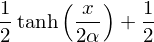

In [5]:
x = sp.symbols("x")
expectedProfile = analytic_interface_profile(x)
expectedProfile


Checking a phase transition from $C_0$ to $C_2$. This means that $\rho=1$ while $phi$ and $psi$ are the analytical profile or 1-analytical profile

In [6]:
for eq in mu_diff_eq:
    eq = eq.subs({rho: 1,
                  phi: 1 - expectedProfile,
                  psi: expectedProfile})
    eq = evaluate_diffs(eq, x).expand()
    assert eq == 0

### Checking the surface tensions parameters


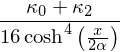

In [9]:
F, _ = free_energy_functional_3_phases(order_parameters)
F = expand_diff_linear(F, functions=order_parameters)  # expand derivatives using product rule
two_phase_free_energy = F.subs({rho: 1,
                                phi: 1 - expectedProfile,
                                psi: expectedProfile})

two_phase_free_energy = sp.simplify(evaluate_diffs(two_phase_free_energy, x))
two_phase_free_energy

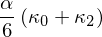

In [10]:
gamma = cosh_integral(two_phase_free_energy, x)
gamma

In [11]:
alpha, k0, k2 = sp.symbols("alpha, kappa_0, kappa_2")
assert gamma == alpha/6 * (k0 + k2)